In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import HistGradientBoostingRegressor

from sklearn.pipeline import Pipeline

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_absolute_error

#Autocompletar rápido
%config IPCompleter.greedy=True

#Desactivar los warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
project_path = 'C:/Users/kunal/MACHINE LEARNING PROJECTS/CREDIT RISK ASSESSMENT'

In [3]:
df_name = 'df_input_ead.pickle'

In [4]:
df = pd.read_pickle(project_path + '/02_Data/03_Work/' + df_name)

In [5]:
x = df.drop(columns='target_ead')
y = df.target_ead.copy()

In [6]:
train_x,val_x,train_y,val_y = train_test_split(x,y,test_size=0.3)

In [7]:
pipe = Pipeline([('algoritmo',Ridge())])

grid = [      
        {'algoritmo': [Ridge()],
         'algoritmo__alpha': np.arange(0.1,1.1,0.1)},
        
        {'algoritmo': [Lasso()],
         'algoritmo__alpha': np.arange(0.1,1.1,0.1)},
    
        {'algoritmo': [HistGradientBoostingRegressor(min_samples_leaf = 100, scoring = 'neg_mean_absolute_error')],
         'algoritmo__learning_rate': [0.01,0.025,0.05,0.1],
         'algoritmo__max_iter': [50,100,200],
         'algoritmo__max_depth': [5,10,20],
         'algoritmo__l2_regularization': np.arange(0,1.25,0.25)}
       ]

In [8]:
grid_search = GridSearchCV(estimator= pipe, 
                           param_grid = grid, 
                           cv = 3, 
                           scoring = 'neg_mean_absolute_error',
                           verbose = 3,
                           n_jobs = -1)

model = grid_search.fit(train_x.values,train_y)

Fitting 3 folds for each of 200 candidates, totalling 600 fits


In [9]:
pd.DataFrame(grid_search.cv_results_).sort_values(by = 'rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algoritmo,param_algoritmo__alpha,param_algoritmo__l2_regularization,param_algoritmo__learning_rate,param_algoritmo__max_depth,param_algoritmo__max_iter,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
88,7.611998,0.062679,1.623959,0.015008,HistGradientBoostingRegressor(min_samples_leaf...,NaN,0.25,0.1,10,200,{'algoritmo': HistGradientBoostingRegressor(mi...,-0.179880,-0.178727,-0.178851,-0.179152,0.000517,1
52,8.652809,0.181001,1.941290,0.013656,HistGradientBoostingRegressor(min_samples_leaf...,NaN,0.0,0.1,10,200,{'algoritmo': HistGradientBoostingRegressor(mi...,-0.179414,-0.179491,-0.179477,-0.179461,0.000034,2
196,8.541737,0.109363,1.816353,0.047372,HistGradientBoostingRegressor(min_samples_leaf...,NaN,1.0,0.1,10,200,{'algoritmo': HistGradientBoostingRegressor(mi...,-0.179819,-0.180078,-0.178863,-0.179587,0.000523,3
160,8.374064,0.037508,1.850827,0.007395,HistGradientBoostingRegressor(min_samples_leaf...,NaN,0.75,0.1,10,200,{'algoritmo': HistGradientBoostingRegressor(mi...,-0.180029,-0.179801,-0.179062,-0.179630,0.000413,4
55,8.360969,0.540898,1.793800,0.121596,HistGradientBoostingRegressor(min_samples_leaf...,NaN,0.0,0.1,20,200,{'algoritmo': HistGradientBoostingRegressor(mi...,-0.179829,-0.179916,-0.179211,-0.179652,0.000314,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14,0.253492,0.029631,0.011959,0.002730,Lasso(),0.5,NaN,NaN,NaN,NaN,"{'algoritmo': Lasso(), 'algoritmo__alpha': 0.5}",-0.344742,-0.343003,-0.344688,-0.344144,0.000807,191
15,0.255080,0.036524,0.012637,0.002554,Lasso(),0.6,NaN,NaN,NaN,NaN,"{'algoritmo': Lasso(), 'algoritmo__alpha': 0.6}",-0.344742,-0.343003,-0.344688,-0.344144,0.000807,191
16,0.323743,0.031884,0.012143,0.007069,Lasso(),0.7,NaN,NaN,NaN,NaN,"{'algoritmo': Lasso(), 'algoritmo__alpha': 0.7...",-0.344742,-0.343003,-0.344688,-0.344144,0.000807,191
18,0.304090,0.043462,0.013345,0.004724,Lasso(),0.9,NaN,NaN,NaN,NaN,"{'algoritmo': Lasso(), 'algoritmo__alpha': 0.9}",-0.344742,-0.343003,-0.344688,-0.344144,0.000807,191


In [10]:
lgbm = HistGradientBoostingRegressor(learning_rate = 0.1,
                                     max_iter = 200,
                                     max_depth = 10,
                                     min_samples_leaf = 100,
                                     scoring = 'neg_mean_absolute_error',
                                     l2_regularization = 0.25)
lgbm.fit(train_x,train_y)

HistGradientBoostingRegressor(l2_regularization=0.25, max_depth=10,
                              max_iter=200, min_samples_leaf=100,
                              scoring='neg_mean_absolute_error')

In [11]:
pred = lgbm.predict(val_x)

In [12]:
print('Max:',pred.max(),'\t Min:',pred.min())

Max: 1.1171615220374116 	 Min: -0.12508314568286846


In [13]:
pred = np.clip(pred, a_min=0, a_max=1)

In [14]:
print('Max:',pred.max(),'\t Min:',pred.min())

Max: 1.0 	 Min: 0.0


In [15]:
mean_absolute_error(val_y, pred)

0.1730114383370427

In [16]:
check = pd.DataFrame({'ead_true':val_y, 'ead_pred':pred})

In [17]:
check.corr()

,ead_true,ead_pred
ead_true,1.000000,0.763286
ead_pred,0.763286,1.000000


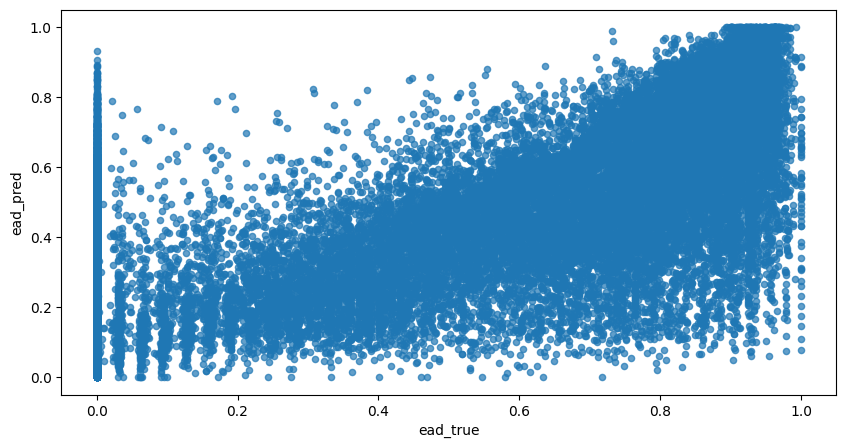

In [18]:
check.plot.scatter(x='ead_true',y='ead_pred', alpha=0.7, figsize=(10,5));

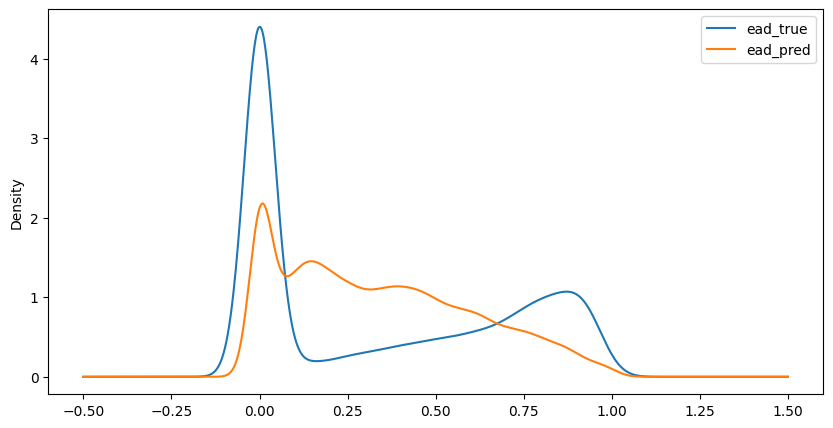

In [19]:
check.plot.density(figsize=(10,5));